In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imshow, imread
import pandas as pd
from time import gmtime, asctime

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [2]:
categories = ['cats', 'dogs', 'panda']
# 0 : Cat, 1 : Dog, 2 : Panda

In [3]:
features = []
target = []

In [4]:
def load_categories(datadir, height=48, width=48):
    for i in categories:
        print(f"[{asctime(gmtime())}] Currently loading the category: '{i}'")

        path=os.path.join(datadir, i)

        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array,(height, width, 3))
            features.append(img_resized.flatten())
            target.append(categories.index(i))

        print(f"[{asctime(gmtime())}] Successfully loaded category: '{i}'")
        
        print()

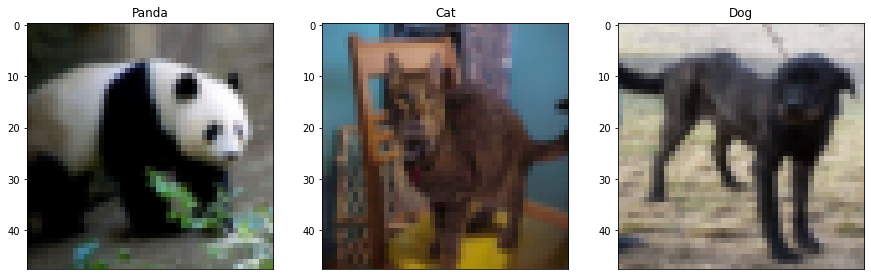

In [5]:
fig, axes = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[0].imshow(resize(imread("animals/panda/panda_00001.jpg"), (48, 48, 3)))
axes[0].set_title("Panda");

axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].imshow(resize(imread("animals/cats/cats_00001.jpg"), (48, 48, 3)))
axes[1].set_title("Cat");

axes[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[2].imshow(resize(imread("animals/dogs/dogs_00001.jpg"), (48, 48, 3)))
axes[2].set_title("Dog");

plt.show()

In [6]:
load_categories("animals")

[Tue Aug 24 11:46:30 2021] Currently loading the category: 'cats'
[Tue Aug 24 11:46:50 2021] Successfully loaded category: 'cats'

[Tue Aug 24 11:46:50 2021] Currently loading the category: 'dogs'
[Tue Aug 24 11:47:11 2021] Successfully loaded category: 'dogs'

[Tue Aug 24 11:47:11 2021] Currently loading the category: 'panda'
[Tue Aug 24 11:47:44 2021] Successfully loaded category: 'panda'



In [7]:
features, target = np.array(features), np.array(target)

In [8]:
features.shape

(3000, 6912)

In [9]:
df = pd.DataFrame(features)
df["Target"] = target

In [11]:
X, y = df.drop("Target", axis=1), df["Target"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
model = SVC(random_state=42, decision_function_shape='ovr', verbose=3, probability=True)

In [14]:
param_grid = {
    "C":[0.01, 1, 100],
    "kernel":["rbf", "sigmoid"],
    "gamma":["scale", "auto"]
}

In [15]:
grid_searcher = GridSearchCV(model, param_grid)

In [17]:
grid_searcher.best_estimator_

SVC(C=1, probability=True, random_state=42, verbose=3)

In [18]:
predictions = grid_searcher.predict(X_test)

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58       341
           1       0.49      0.48      0.48       322
           2       0.82      0.80      0.81       327

    accuracy                           0.63       990
   macro avg       0.63      0.63      0.63       990
weighted avg       0.63      0.63      0.63       990



In [21]:
from joblib import dump
dump(grid_searcher, "model.h5")

['model.h5']

Enter URL of Image : https://i.pinimg.com/originals/90/26/ff/9026ff594bed9f2090127d5ac8776e84.jpg


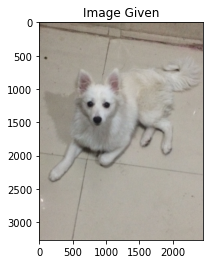


cats = 40.27208366369787%
dogs = 59.65753161188716%
panda = 0.07038472441497119%

The predicted image is : dogs




New Image[Y/N]:  n


In [37]:
while True:
    url=input('Enter URL of Image :')

    img=imread(url)
    plt.tick_params()
    plt.title("Image Given")
    plt.imshow(img)
    plt.show()

    img_resize=resize(img,(48, 48, 3))
    l=[img_resize.flatten()]

    print("")

    probability=grid_searcher.predict_proba(l)
    for ind,val in enumerate(categories):
        print(f'{val} = {probability[0][ind]*100}%')

    print("")

    print("The predicted image is : "+categories[grid_searcher.predict(l)[0]])

    print("")

    confirmation = str(input("New Image[Y/N]: ")).lower()
    if confirmation == "y":
        continue
    else:
        break